# Исследование   рынка компьютерных игр.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования.**

Выявить определяющие успешность игры закономерности.

**Ход исследования.**

1.Откроем файл с данными и изучим общую информацию.

2.Подготовка данные

3.Исследовательский анализ данных

4.Портрет пользователя каждого региона

5.Проверка гипотезы

6.Ообщий вывод

**Описание данных:**

**Name** — название игры

**Platform**— платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Сев/ерной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 

компьютерных игр и присваивает им подходящую возрастную категорию.

### Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns
sns.set_theme(style="ticks")
pd.set_option('display.max_columns',None)


In [2]:
df=pd.read_csv('games.csv')
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Колличесво и процент пропусков по каждому столбцу
def nan_values(df):
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df
nan_values(df)

,column_name,num_missing,percent_missing
Name,Name,2,0.01
Platform,Platform,0,0.00
Year_of_Release,Year_of_Release,269,1.61
Genre,Genre,2,0.01
NA_sales,NA_sales,0,0.00
EU_sales,EU_sales,0,0.00
JP_sales,JP_sales,0,0.00
Other_sales,Other_sales,0,0.00
Critic_Score,Critic_Score,8578,51.32
User_Score,User_Score,6701,40.09


In [5]:
#Посчитаем количество явных дубликатов.
df.duplicated().sum()

0

**Вывод**
При ознакомление с файлом обнаруженны пропуски в даных и не соответсвие типа данных.

    

### Предобработка данных


In [6]:
df.columns   # просмотрим названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower() # приведение названия столбцов к нижнему регистру.
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Удалили пропуски изменили тип данных. Пропуски составляют маленький % от данных  и восстановить  практически не возможно.**

In [8]:
df=df.dropna(subset = ['year_of_release'])
df['year_of_release']=df['year_of_release'].astype('int64')
df=df.dropna(subset = ['name'])
df=df.dropna(subset = ['genre'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**Tbd**-To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется
tbd можно заменить на nan  для дальнейшего иследования.


In [9]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [10]:
# заменим tbd на NAN  и приведем к нужному типу данных.
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

In [11]:
df.query('year_of_release <1994').isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       362
user_score         362
rating             361
dtype: int64

 **В последних трех столбцах прорущенные значения оставим как есть, пропуски могут быть связанны  с годом выпуска до 94 года организации ESRB не существовало поэтому могут быть пропуски.Во мноших строках  с годом  меньше 2000 значения отсутвуют во всех столбцах с оценкой, что говорит об взаимосвязи этих данных. Оставим более качественные данные хоть и в меньшем кооличестве.**

In [12]:
#  посчитали сумарные продажи во всех регионах и добавили в отдельный столбец.

df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод**

**При подготовке данных были удалены пропуски где был маленький процент потерь, изменены типы данных на числовые, в последних трех столбцах пропуски оставили так заполнить их нет возможности. Заменили абривеатуру tbd на nan.Данные подготовленны к дальнейшему анализу.**

### Проведите исследовательский анализ данных

#### Выпуск игр по годам  и  распределение продаж по платфломам.

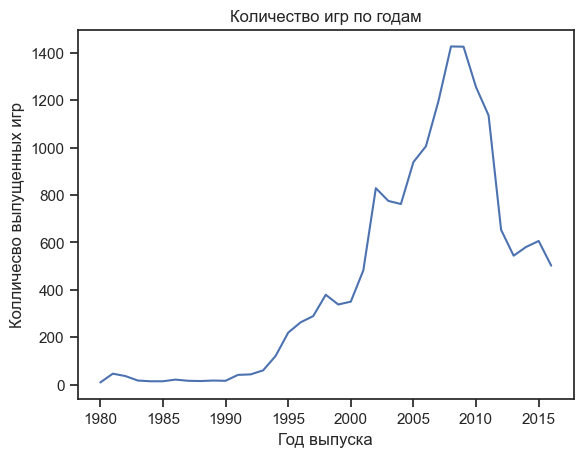

In [54]:
sns.lineplot(x = 'year_of_release', y = 'name', data = df.groupby('year_of_release').count())
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Колличесво выпущенных игр")
plt.show()

Данные до 2000 года можно считать устаревшими и не рассматривать их. Основной прирост идет с 2000 года значит именно там интересующие нас показатели.

In [14]:
df['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: name, Length: 11426, dtype: int64

**Еть игры которые повторяются, выпуск игры считается один раз, но продажи фигурируют на разных платформах и разных странах. Посмотри динамику уникальных игр.** 

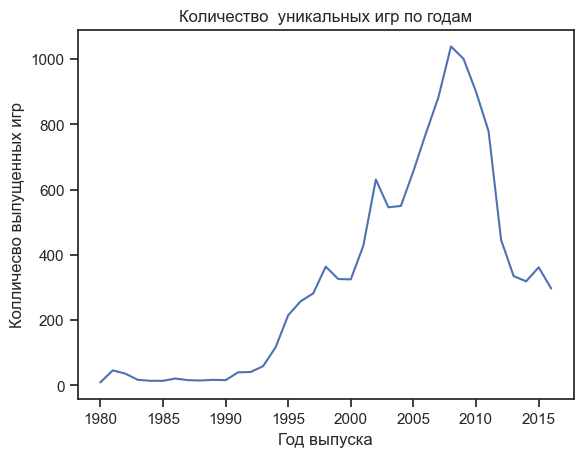

In [53]:
df.groupby(by='year_of_release')['name'].nunique().plot()
plt.title("Количество  уникальных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Колличесво выпущенных игр")
plt.show()

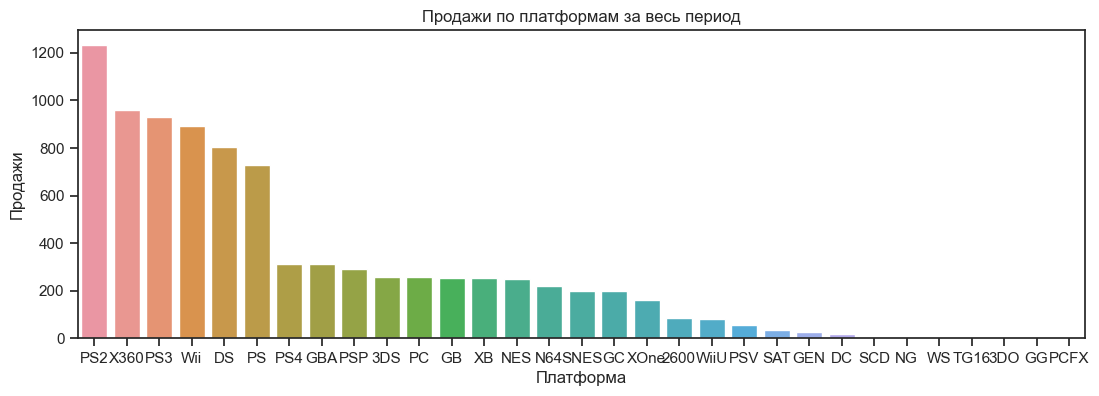

In [16]:
# продажи по платформам 
sale_platform = df.pivot_table(index = 'platform',values = 'total_sales',aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
plt.figure(figsize=(13,4))
sns.barplot(x = sale_platform.index,y = sale_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

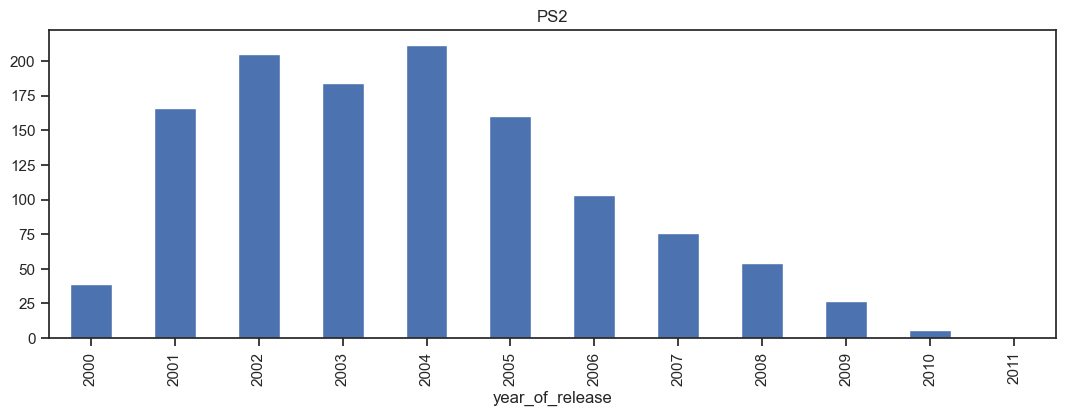

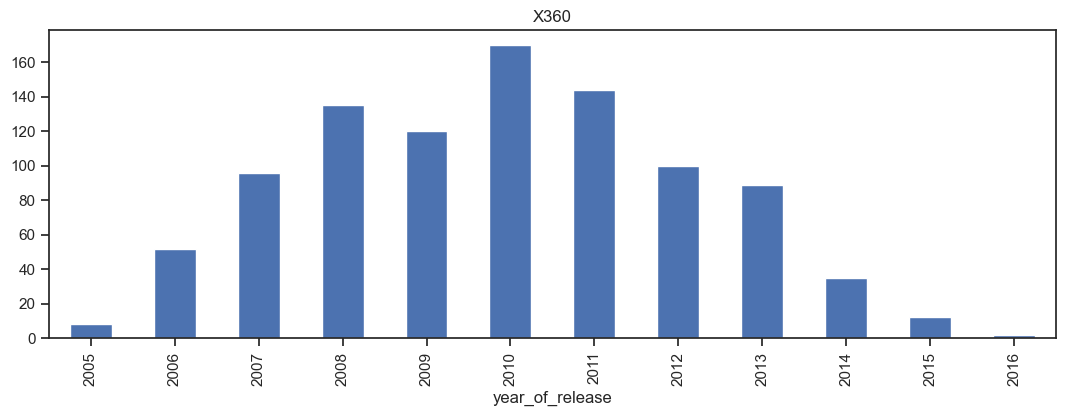

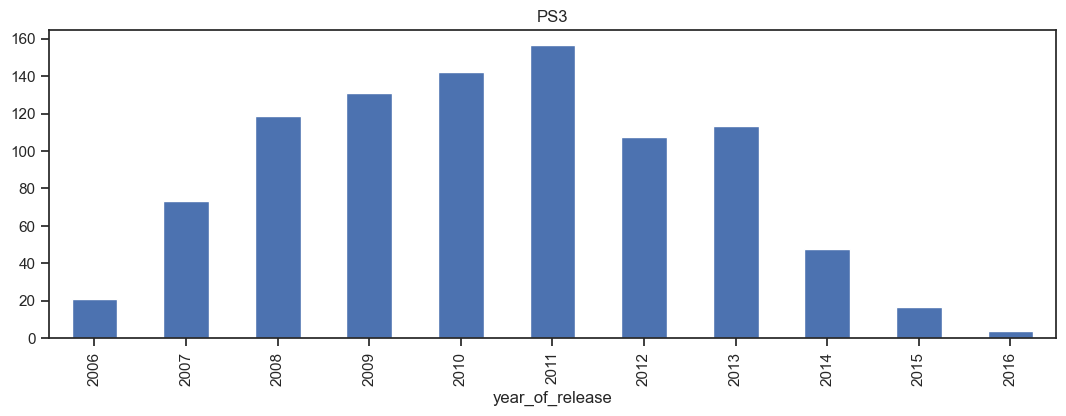

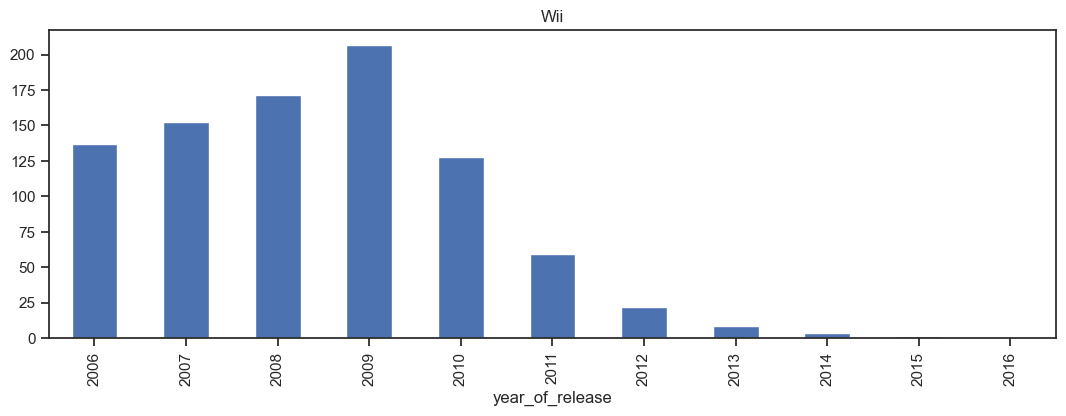

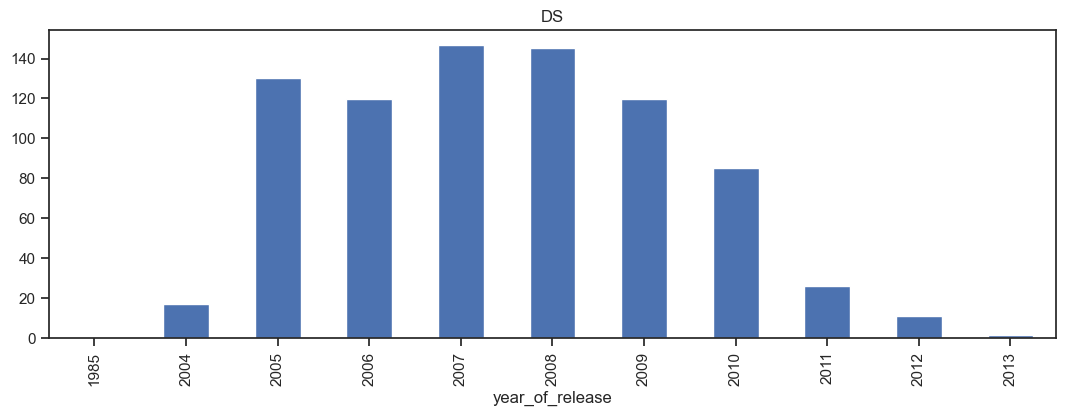

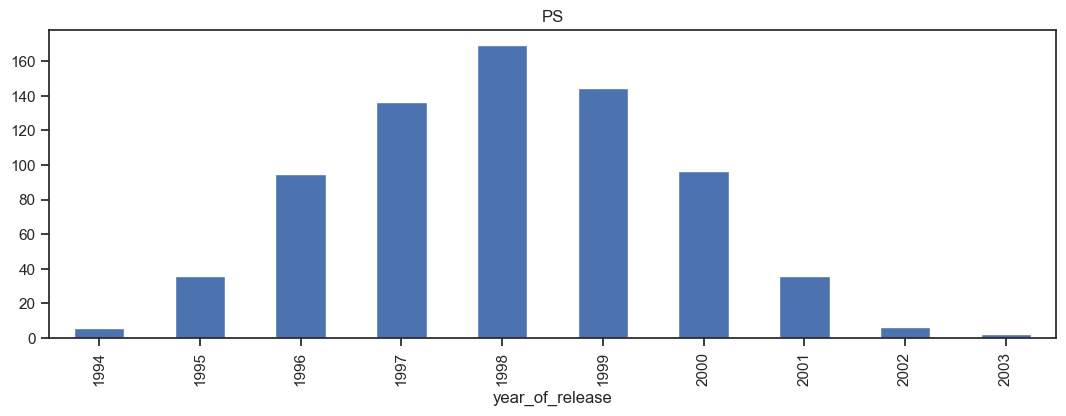

In [17]:
# Продажи по годам по платфомам с ниабольшими сумарными продажами.
top_platform = ['PS2','X360','PS3','Wii','DS','PS']
for platform in top_platform:
    df[df['platform']==platform].pivot_table(index = 'year_of_release',values='total_sales',aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
  
    plt.title(platform)
    plt.legend('',frameon=False)


**Вывод**

*Цикл жизни плотформы около 10 лет. От появления на рынке до полного падения продаж или даже снятия с производства. Если связать  график продаж по годам и  продажи по платформам то можно увидить что все пики роста связаны выхода новой консоли. осообенно это заментно начиния с 2000 года. 2004-2006 года самый большой рост продаж это связанно с тем что на рынок вышло много разных консолей PS3(2006), X360(2005), Wii(2006), DS(2004). 2008  рынок вышел на плато и после пошел в низ следуйщий пик скорее всего связа н с выходом PS4(2013).  Платформы теряют свои позиции с развитием мобильных игр  данных по которым у нас нет. Так же появления севисов таких как 'steam' могло привести к подению продаж игр именно для консолей. Цена покупки игы достаточна высока,  покупаю в сервисе ты можешь играть но ноутбуке или пк , но цена гораздо дешевде.
Для дальнейшего анализа актуальны года с 2013 года(3 года пиковых продаж для каждой консоли). Беря такой интервал, мы сможем увидить как покидающие рынок платформы так и только появившиеся.*

#### Выпуск игр по годам  и  распределение продаж по платфломам в период с 2013 года

In [18]:
df_new = df[df['year_of_release']>=2013]  # создаем новый датафрейм с 2013 года
df_new.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


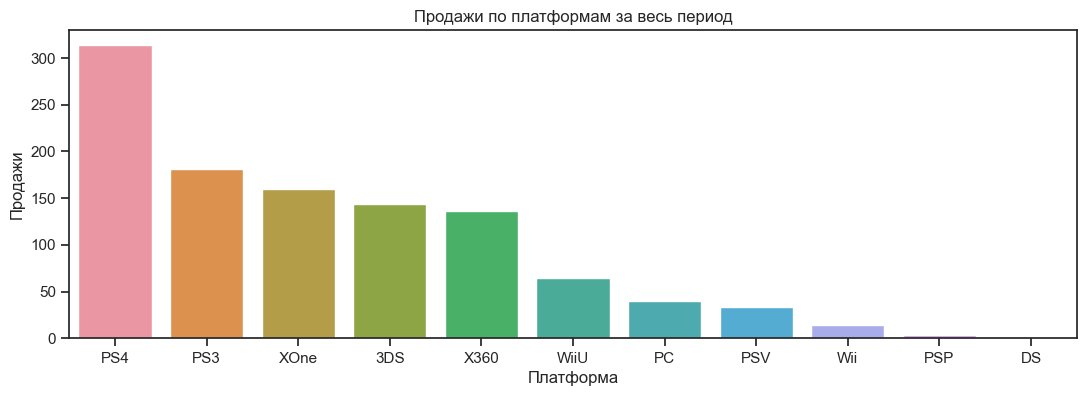

In [19]:
# продажи по платформам 
sale_platform = df_new.pivot_table(index = 'platform',
                                   values = 'total_sales',aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x =  sale_platform.index, y = sale_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

In [20]:
#  сохраняем в переменной только 5 лидирующих платформ
df_new_game = df_new[df_new['platform'].isin(['PS4','PS3','XOne','3DS','X360'])]
df_new_game.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [21]:
df_game_group = df_new_game.groupby(['year_of_release','platform']).agg({'total_sales':['sum','median']})
df_game_group

total_sales       
                                 sum median
year_of_release platform                   
2013            3DS            56.57  0.100
                PS3           113.25  0.310
                PS4            25.99  1.530
                X360           88.58  0.430
                XOne           18.96  0.800
2014            3DS            43.76  0.090
                PS3            47.76  0.160
                PS4           100.00  0.600
                X360           34.74  0.230
                XOne           54.07  0.440
2015            3DS            27.78  0.090
                PS3            16.82  0.050
                PS4           118.90  0.180
                X360           11.96  0.180
                XOne           60.14  0.245
2016            3DS            15.14  0.080
                PS3             3.60  0.065
                PS4            69.25  0.085
                X360            1.52  0.100
                XOne           26.15  0.060

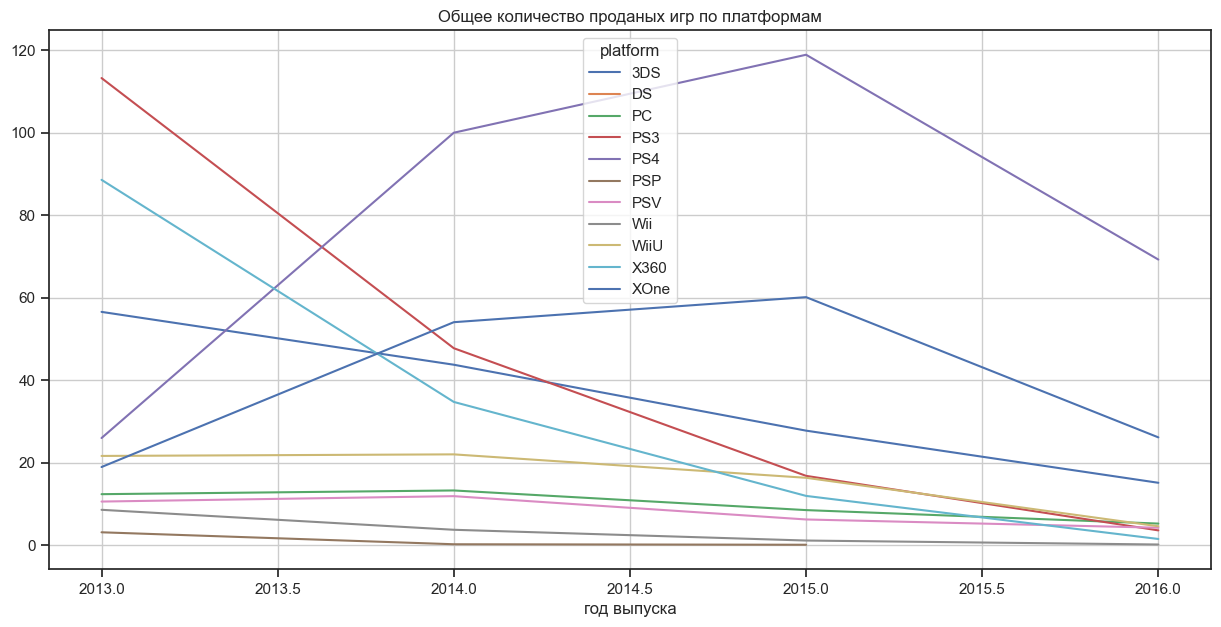

In [22]:
df_new.pivot_table(index='year_of_release',
                   columns = 'platform', values='total_sales',
                   aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title("Общее количество проданых игр по платформам")
plt.xlabel("год выпуска")
plt.show()

 Начиная с 2013 года продажи растут у платформ PS4 и XOne. К 2016 продажи падают, но не так сильно как у остальных платформ можно сказать что, это ведущие по продажам платформ.  Продажи у  PS3 X360 стремительно падают к 2016 году.

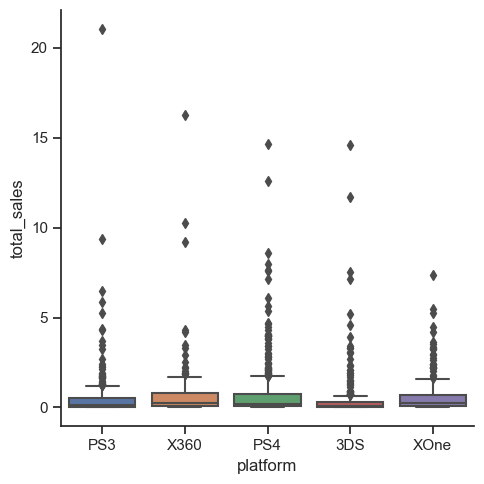

In [23]:
sns.catplot(x = 'platform',
           y = 'total_sales',
           kind = 'box',
           data = df_new_game)
plt.show()

 Мы видим большое колличество выбросов в районе 2 мл, уберем их.

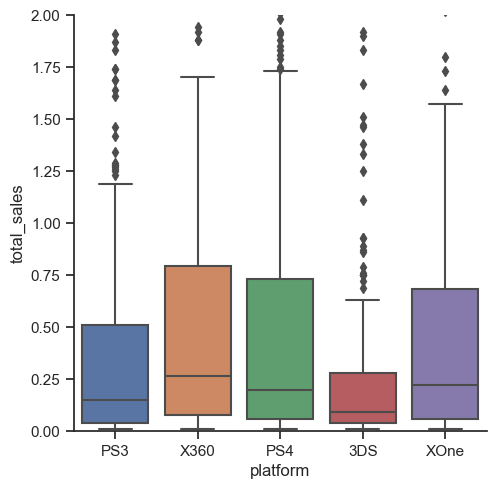

In [24]:
sns.catplot(x = 'platform',
           y = 'total_sales',
           kind = 'box',
           data = df_new_game)
plt.ylim(0, 2)
plt.show()

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера_V2 <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

👍

**Вывод**

*Для дальнейшего анализа были взяты данные начиная с 2013 года.  При рассмотрении продаж по всем годам отобраны 5 наиболее прибыльных платформ. При рассмотрении продаж по каждой платформе по годам можно увидеть развитее платформ, а так же их угасания. PS3 в 2013 имела не плохие продажи, но уже к 2016 практически покинула рынок. PS4 же в 2013 только вышла на рынок и в 2016 продолжала оставаться в лидерах по продажам. При расмотрение ящика с усами видно 3 лидеров по продажам PS4, X360, XOne медиана и размах примерно на одном уровне, можно сказать что у этих платформ есть больше игр, которые покупались намного чаще.*

#### Влияние на продажи отзывов критиков  и пользователей.

In [25]:
df_ps4 = df_new_game[df_new_game['platform']=='PS4']
print('Корреляция между отзывами критиков и продажами', df_ps4['critic_score'].corr(df_ps4['total_sales']))
print('Корреляция между отзывами пользователей и продажами ', df_ps4['user_score'].corr(df_ps4['total_sales']))



Корреляция между отзывами критиков и продажами 0.40656790206178095
Корреляция между отзывами пользователей и продажами  -0.031957110204556424


In [26]:
df_ps3 = df_new_game[df_new_game['platform']=='PS3']
print('Корреляция между отзывами критиков и продажами', df_ps3['critic_score'].corr(df_ps3['total_sales']))
print('Корреляция между отзывами пользователей и продажами ', df_ps3['user_score'].corr(df_ps3['total_sales']))

Корреляция между отзывами критиков и продажами 0.3342853393371919
Корреляция между отзывами пользователей и продажами  0.0023944027357566925


In [27]:
df_XOne = df_new_game[df_new_game['platform']=='XOne']
print('Корреляция между отзывами критиков и продажами ', df_XOne['critic_score'].corr(df_XOne['total_sales']))
print('Корреляция между отзывами пользователей и продажами ', df_XOne['user_score'].corr(df_XOne['total_sales']))

Корреляция между отзывами критиков и продажами  0.4169983280084017
Корреляция между отзывами пользователей и продажами  -0.06892505328279414


In [28]:
df_3DS = df_new_game[df_new_game['platform']=='3DS']
print('Корреляция между отзывами критиков и продажами', df_3DS['critic_score'].corr(df_3DS['total_sales']))
print('Корреляция между отзывами пользователей и продажами ', df_3DS['user_score'].corr(df_3DS['total_sales']))

Корреляция между отзывами критиков и продажами 0.3570566142288103
Корреляция между отзывами пользователей и продажами  0.24150411773563016


In [29]:
df_X360 = df_new_game[df_new_game['platform']=='X360']
print('Корреляция между отзывами критиков и продажами', df_X360['critic_score'].corr(df_X360['total_sales']))
print('Корреляция между отзывами пользователей и продажами ', df_X360['user_score'].corr(df_X360['total_sales']))

Корреляция между отзывами критиков и продажами 0.3503445460228664
Корреляция между отзывами пользователей и продажами  -0.011742185147181342


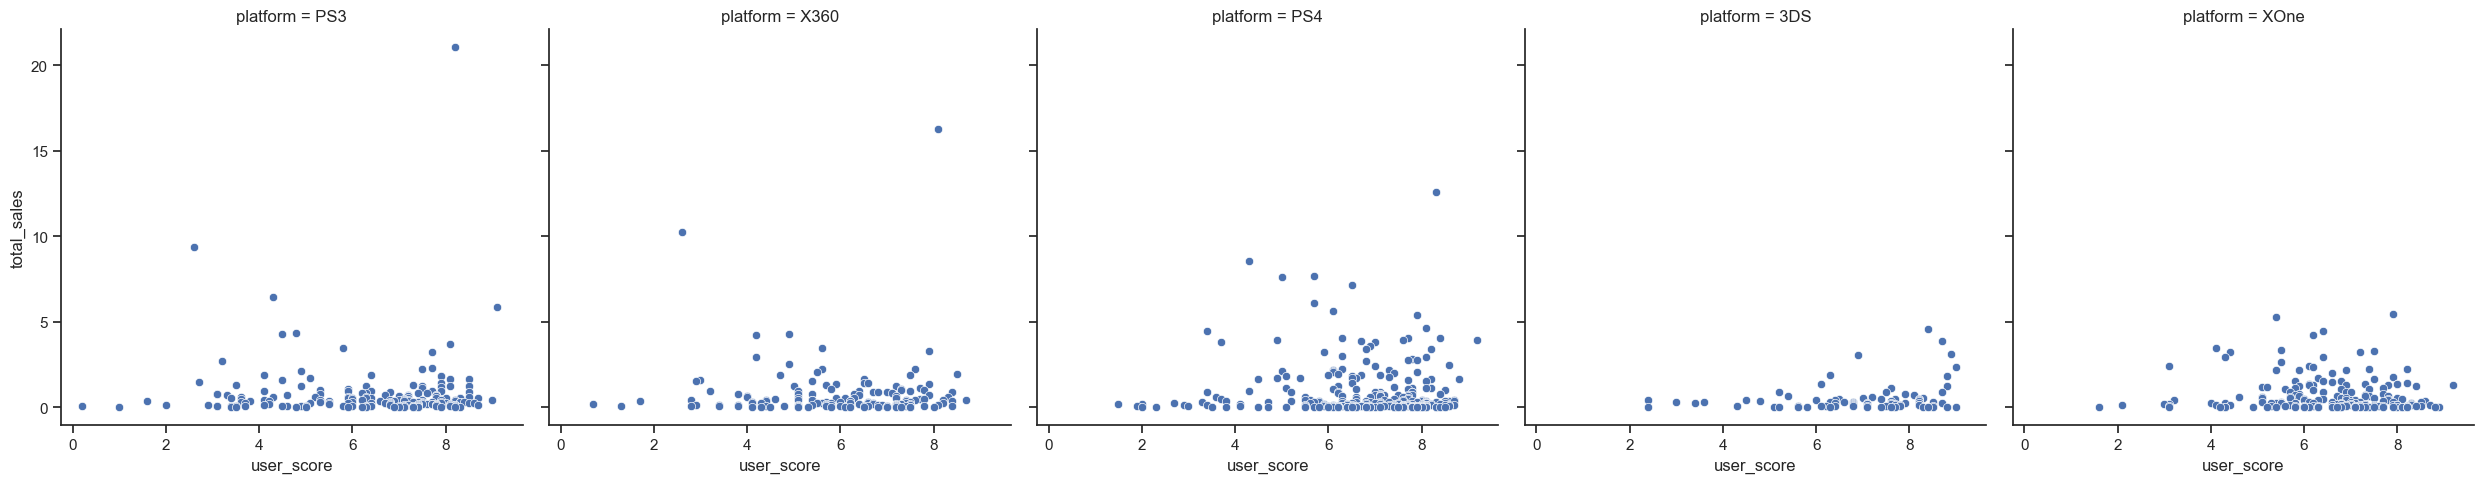

In [30]:
# Корреляция между отзывами пользователей и продажами по каждой платформе
sns.relplot(
    x = 'user_score', 
    y = 'total_sales', 
    data = df_new_game, 
    kind = 'scatter', 
    col = 'platform')
plt.show()

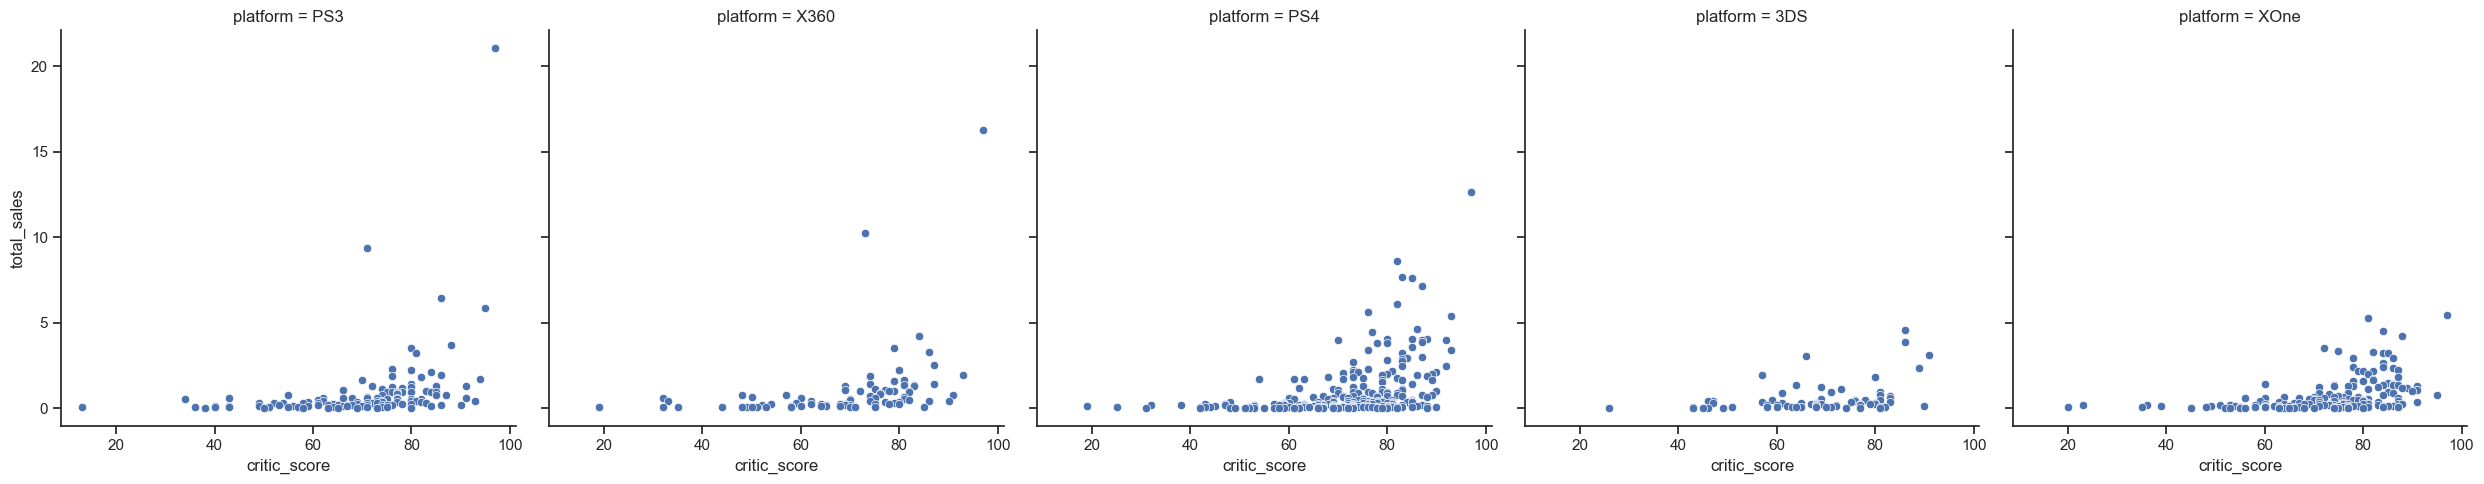

In [31]:
# Корреляция между отзывами критиков и продажами по каждой платформе
sns.relplot(
    x='critic_score', 
    y='total_sales', 
    data=df_new_game, 
    kind='scatter', 
    col='platform')

**Вывод**

*При рассмотрение корреляции можно увидеть, что оценке ползоваткелей практически не влияют на продажи, а зависимость от критиков слабая, но все же есть. Это говорит, о том что, покупатели прислушиваются больше к критикам.*

#### Общее распределение игр по жанрам.

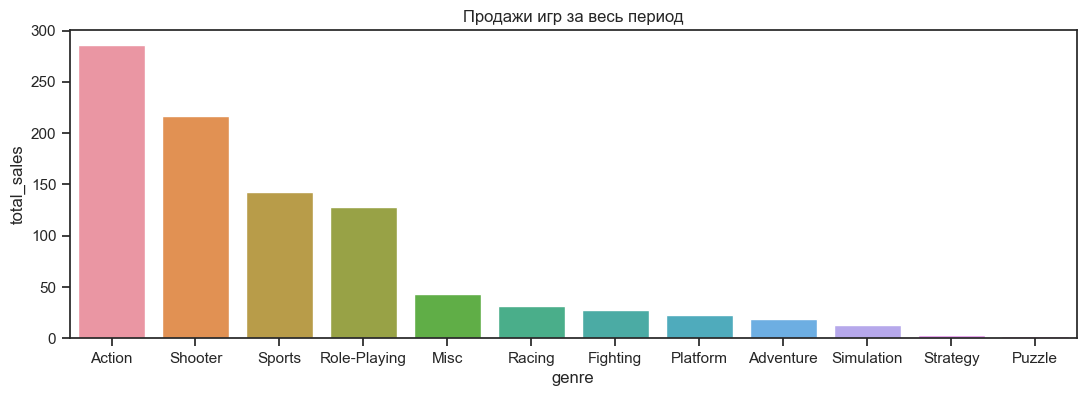

In [32]:
# продажи игр
sale_game = df_new_game.pivot_table(index = 'genre',
                                    values = 'total_sales',aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
plt.figure(figsize=(13,4))
sns.barplot(x = sale_game.index,y = sale_game['total_sales'])
plt.title("Продажи игр за весь период")
plt.show()

 По сумме продаж самые популярные  жанры Action, Shooter, Sports, Role-Playing. Посмотрим  медианное распределение и построим "ящик с усами"

In [33]:
# распределение игр по продажам
df_genre = df_new_game.pivot_table(index = 'genre', values = 'total_sales', aggfunc ='median').sort_values(by ='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
df_genre

,genre,total_sales
0,Shooter,0.620
1,Sports,0.365
2,Platform,0.240
3,Racing,0.180
4,Role-Playing,0.180
5,Fighting,0.150
6,Action,0.140
7,Misc,0.130
8,Simulation,0.100
9,Strategy,0.080


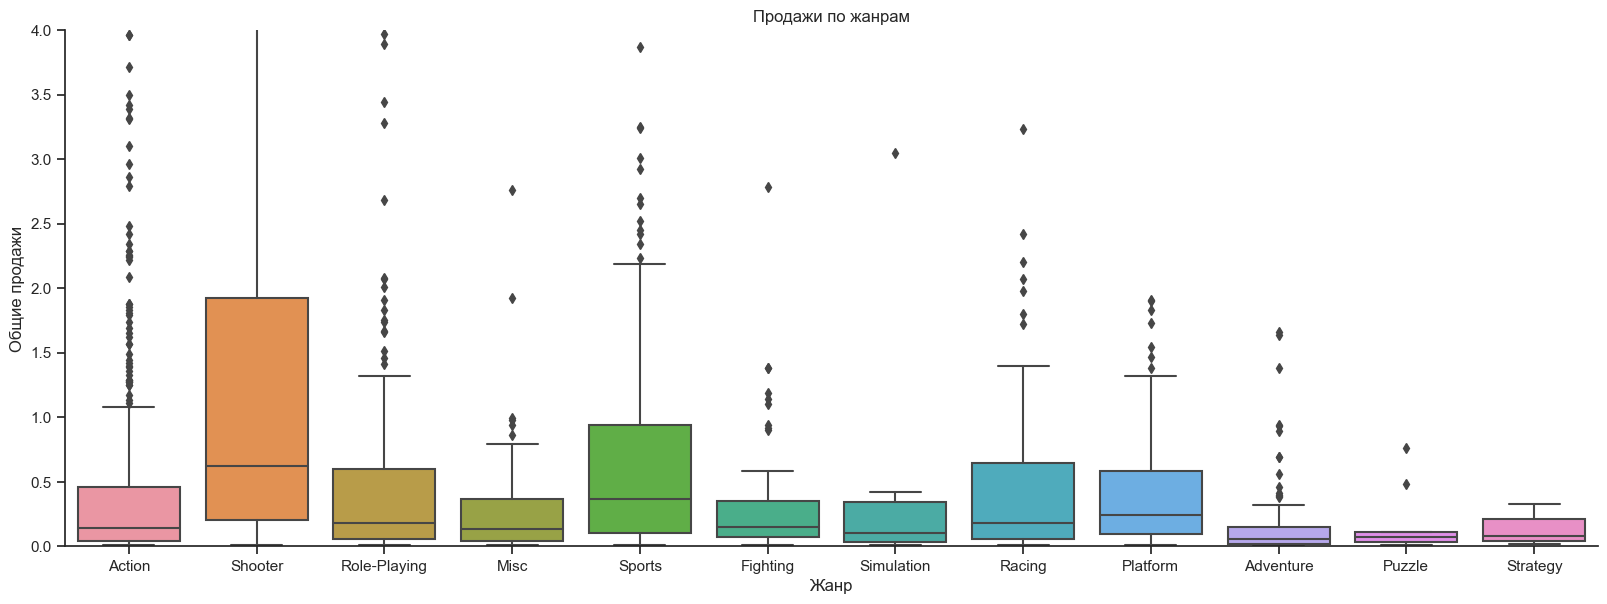

In [34]:
sns.catplot(x = 'genre',
           y = 'total_sales',
           kind = 'box',
           data = df_new_game,
           height=6,
           aspect=2.7)
plt.title( "Продажи по жанрам")
plt.xlabel('Жанр')
plt.ylabel('Общие продажи')
plt.ylim(0, 4)
plt.show()

 **При расмотрение медианных значений лидеры сменились. на графике "ящик с усами " видно то наиболее прибыльные  и стабильные это жанры Shooter, Sports, Platform. В жанре Action большое колличесво  мелких игр не приносящих стабильный доход. Они просто выстрели и пропали.**

**Вывод**

*Самые прибыльные жанры Shooter, Sports, Platform. Самые не прибыльные и практически не продающиеся это Puzzle,Adventure.*	

### Портрет пользователя каждого региона

#### Портрет пользователя NA

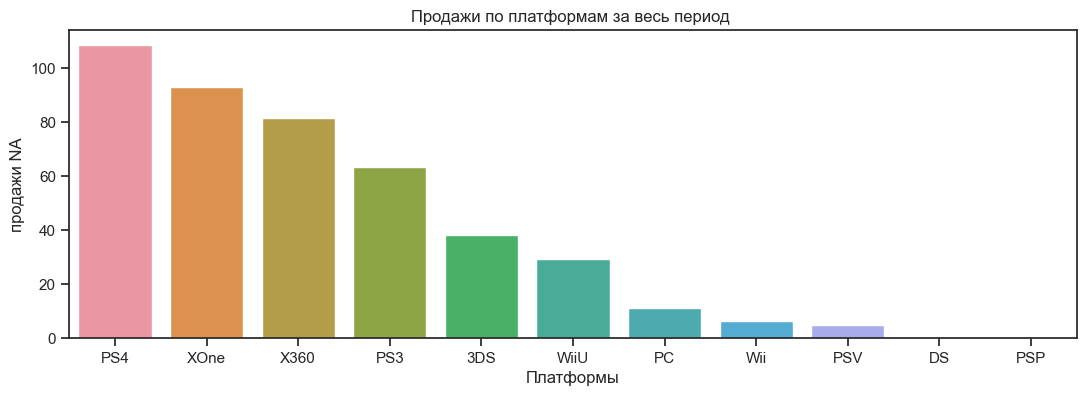

In [35]:
sale_platform_na = df_new.pivot_table(index = 'platform',
                                      values = 'na_sales',aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)
plt.figure(figsize = (13,4))
sns.barplot(x = sale_platform_na.index,y = sale_platform_na['na_sales'])
plt.title("Продажи по платформам за весь период ")
plt.xlabel('Платформы')
plt.ylabel('продажи NA')
plt.show()

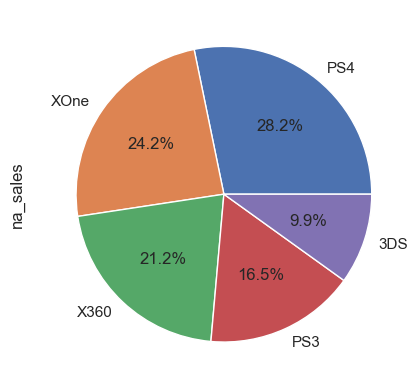

In [36]:
(df_new.pivot_table(index = 'platform',
                  values = 'na_sales',
                  aggfunc = 'sum')
 .sort_values(by = 'na_sales',ascending=False)
 .head()
 .plot(y = 'na_sales',kind = 'pie',legend = False,autopct = '%1.1f%%'))
plt.show()

In [37]:
df_genre_na = df_new.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).reset_index().rename_axis(None, axis=1)
df_genre_na.head(5)


,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


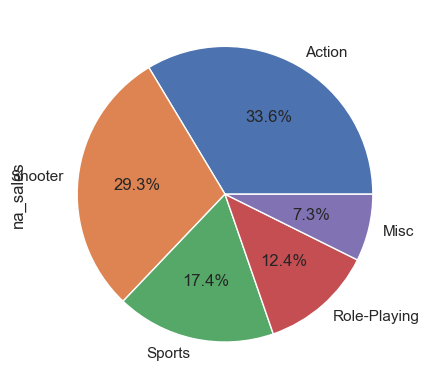

In [38]:
(df_new.pivot_table(index = 'genre',
                  values = 'na_sales',
                  aggfunc = 'sum')
 .sort_values(by = 'na_sales',ascending=False)
 .head()
 .plot(y = 'na_sales',kind = 'pie',legend = False,autopct = '%1.1f%%'))
plt.show()

In [39]:
df_new['rating']=df_new['rating'].fillna('Unknow')

C:\Users\alena\AppData\Local\Temp\ipykernel_11300\1358374863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['rating']=df_new['rating'].fillna('Unknow')


<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Хорошо бы и жанры визуализировать.

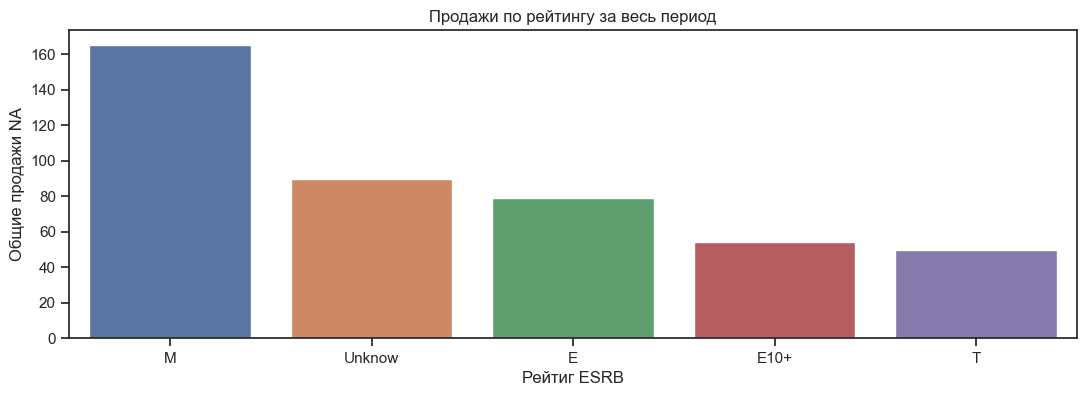

In [40]:
sale_rating_na = df_new.pivot_table(index = 'rating',values = 'na_sales',aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
plt.figure(figsize = (13,4))
sns.barplot(x = sale_rating_na.index,y = sale_rating_na['na_sales'])
plt.title("Продажи по рейтингу за весь период")
plt.xlabel('Рейтиг ESRB')
plt.ylabel('Общие продажи NA')
plt.show()

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера_V2 <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

👍

**Вывод**

*Самая популярная платформа PS4. следом за ней идут XOne,X360. Продажи по платформам между первыми тремя разделенны практически равно мерно. 
Самые популярные жанры Action и Shooter.
По рейтингу самые популярные игры с рейтингом М( от 17 лет) следующие  игры без рейтинга.**

#### Портрет пользователя EU

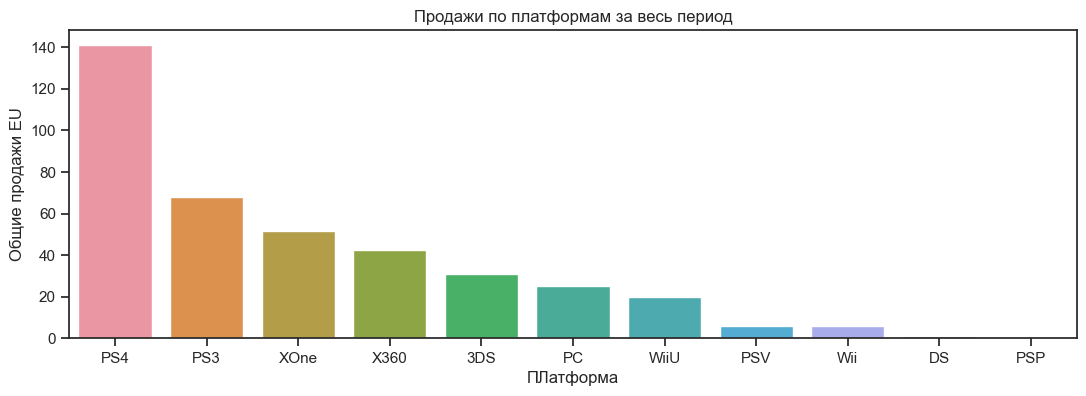

In [41]:
sale_platform_eu = df_new.pivot_table(index = 'platform',
                                      values = 'eu_sales',aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
plt.figure(figsize = (13,4))
sns.barplot(x = sale_platform_eu.index,y = sale_platform_eu['eu_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel('ПЛатформа')
plt.ylabel('Общие продажи EU')
plt.show()

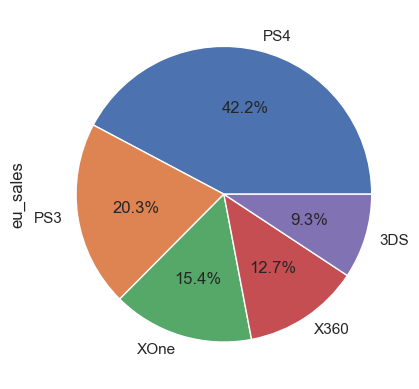

In [42]:
(df_new.pivot_table(index = 'platform',
                  values = 'eu_sales',
                  aggfunc = 'sum')
 .sort_values(by = 'eu_sales',ascending=False)
 .head()
 .plot(y = 'eu_sales',kind = 'pie',legend = False, autopct = '%1.1f%%'))
plt.show()

In [43]:
df_genre_eu = df_new.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).reset_index().rename_axis(None, axis = 1)
df_genre_eu.head(5)

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


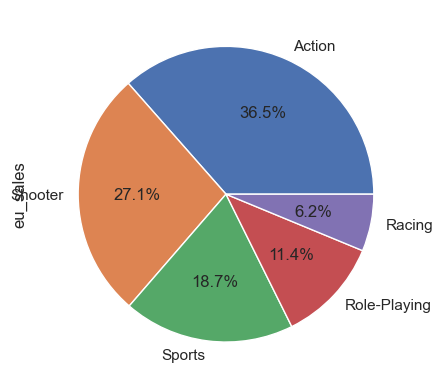

In [44]:
(df_new.pivot_table(index = 'genre',
                  values = 'eu_sales',
                  aggfunc = 'sum')
 .sort_values(by = 'eu_sales',ascending=False)
 .head()
 .plot(y = 'eu_sales',kind = 'pie',legend = False, autopct = '%1.1f%%'))
plt.show()

Text(0, 0.5, 'Общие продажи EU')

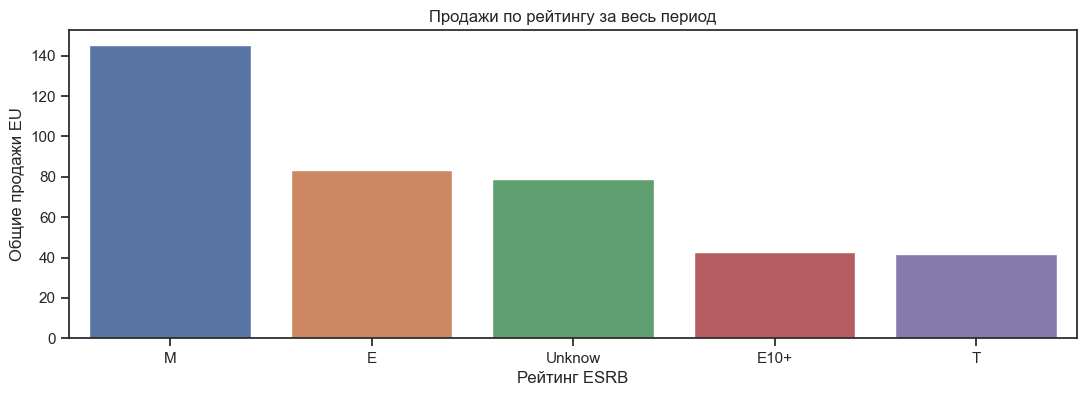

In [45]:
sale_rating_eu = df_new.pivot_table(index = 'rating',
                                    values = 'eu_sales',aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
plt.figure(figsize = (13,4))
sns.barplot(x = sale_rating_eu.index,y = sale_rating_eu['eu_sales'])
plt.title("Продажи по рейтингу за весь период")
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Общие продажи EU')

**Вывод**

*Самая популярная платформа PS4. Следом за ней идут PS3,XOne. Очевидный лидер по продажам PS4. Платформа занимает большую часть рынка.
Самые популярные жанры Action и Shooter.
По рейтингу самые популярные игры с рейтингом М( от 17 лет) следующие Е( для всех).( распределение практически такое же как и  NA)*

#### Портрет пользователя JP

Text(0, 0.5, 'Общие продажи Jp')

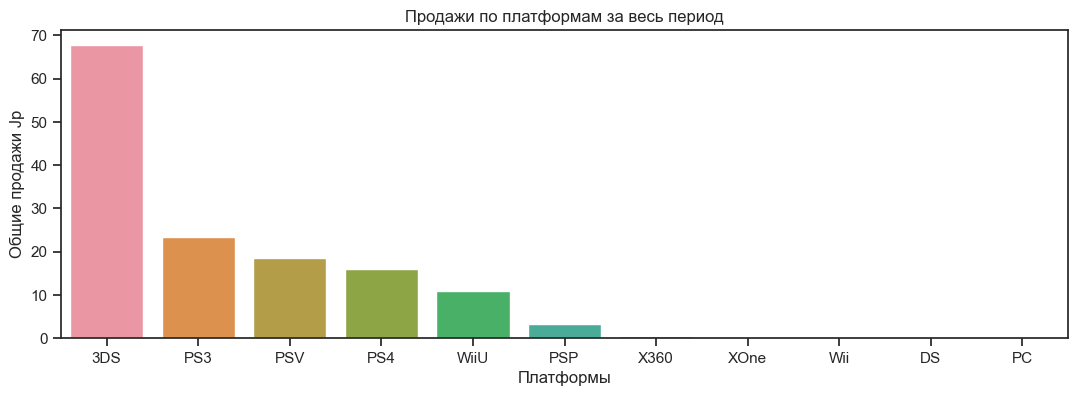

In [46]:
sale_platform_jp = df_new.pivot_table(index = 'platform',
                                      values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
plt.figure(figsize = (13,4))
sns.barplot(x = sale_platform_jp.index,y = sale_platform_jp['jp_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel('Платформы')
plt.ylabel('Общие продажи Jp')

<AxesSubplot:ylabel='jp_sales'>

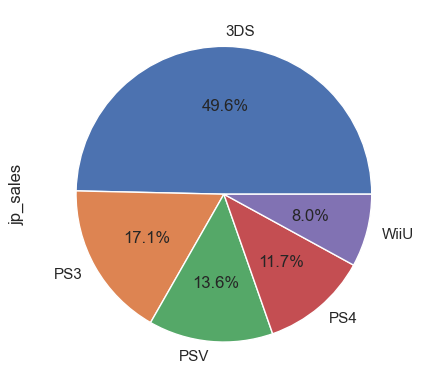

In [47]:
(df_new.pivot_table(index = 'platform',
                  values = 'jp_sales',
                  aggfunc = 'sum')
 .sort_values(by = 'jp_sales',ascending=False)
 .head()
 .plot(y = 'jp_sales',kind = 'pie',legend = False, autopct = '%1.1f%%'))

In [48]:
df_genre_jp = df_new.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).reset_index().rename_axis(None, axis=1)
df_genre_jp.head(5)

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


<AxesSubplot:ylabel='jp_sales'>

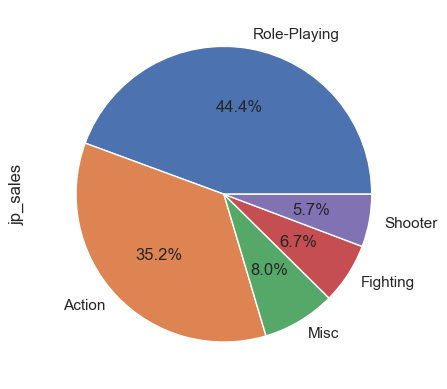

In [49]:
(df_new.pivot_table(index = 'genre',
                  values = 'jp_sales',
                  aggfunc = 'sum')
 .sort_values(by = 'jp_sales',ascending=False)
 .head()
 .plot(y = 'jp_sales',kind = 'pie',legend = False, autopct = '%1.1f%%'))

Text(0, 0.5, 'Общие продажи ОJP')

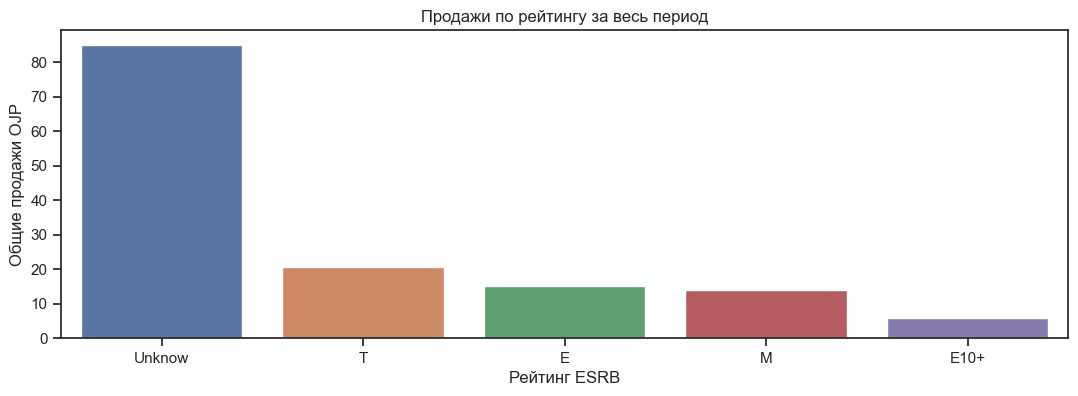

In [50]:
sale_rating_jp=df_new.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales', ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=sale_rating_jp.index,y=sale_rating_jp['jp_sales'])
plt.title("Продажи по рейтингу за весь период")
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Общие продажи ОJP')

**Вывод**

*Самая популярная платформа 3DS, следом за ней идут PS3,PSV.  Очевидный лидер по продажам 3DS. Платформа занимает большую часть рынка. Японца предпочитают более мобильные устройства который можно брать с собой и играть при передвижение по городу.В Японии очень много времени человек проводит в транспорте. В метро, автобусах, на станциях люди занимают себя телефоном или портативными консолями.
Самые популярные жанры Role-Playing, Action.
По рейтингу самые популярные игры без рейтинга.*

**Вывод по 4**

**Рынок NA и EU достаточно сжожи по предпочтения в жанраж и игровых платформах. Лидирующую позицию занимает платформа PS4. лидирующие жанры Action и Shooter. По рейтингу это игры категории  М( от 17 лет) следующие Е( для всех)
Рынок Японии разительно отличается. Японцы предпочитают  переносные консоли поэтому лидер с реди платформ 3DS. По жанрам лидеры Role-Playing, Action. Рейтиг очевидно не важен для Японского пользователя. Японский рынок игр дасточно сильно отличается от Европы и Северной Америки.
Так как ESRB  это ассоциация определяющая возрастной рейтинг компьютерных игр в США и Канаде. Отсутствие  рейтинга  не снижает продажи  в Японии, наоборот большая часть игр как раз без рейтинга скорее всего это игры созданые внутри региона  поэтому не имееющие этого рейтинга.**


### Проверка гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;



**Нулевая гипотеза H0**:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза H1**:Средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [51]:
Xbox_One = df_new[df_new['platform']=='XOne'] #подборки по нужным платформам
PC = df_new[df_new['platform']=='PC']
Xbox_score = Xbox_One['user_score']    # создали переменые с пользовальтельскими рейтингами
PC_score = PC['user_score']
alpha = .05 
results = st.ttest_ind(
    Xbox_score.dropna(), # удаляем все  nan
    PC_score.dropna(),
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулеввая гипотеза Н0**:Средние пользовательские рейтинги жанров Action  и Sports одинаковые.

**Альтернативная гипотеза Н1**:Средние пользовательские рейтинги жанров Action  и Sports разные.

In [52]:
action = df_new[df_new['genre']=='Action']   #подборки по нужным жанрам
spots = df_new[df_new['genre']=='Sports'] 
action_score = action['user_score']    # создали переменые с пользовальтельскими рейтингами
spots_score = spots['user_score']
alpha=.05
results = st.ttest_ind(
    action_score.dropna(),  # удаляем все  nan
    spots_score.dropna(),
    equal_var=False)
    

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод по 5**

**Гипотеза**:"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".**Не получилось отвергнуть нулевую гипотезу**

**Гипотеза**:"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."**Отвергаем нулевую гипотезу**

### Ообщий вывод

Для анализа данных были представленны  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

В ходе пред обработки мы привели название столбцов к нижнему регистру. Изменили тип данных в столбцах year_of_release,  user_score. Заменили сокращение Tbd(To Be Determined) на  nan. Данные были не заполнены изначально. Посчитали добавили столбец с общими продажами.
 
Проведя анализ рынка по годам, обратили внимание что рынок начал расти с 2000 года. Каждый пик на графике связан с выходом на рынок новой консоли PS3(2006ми), X360(2005), Wii (2006), DS (2004). С 208 года рынок вышел на плато и после началось снижение следующий скачок скорее всего связан с выходом PS4(2013). Определили, что полный жизненный цикл платформы около 10 лет. Для дальнейшего анализа взяли данные начиная с2013 года (3 года пиковых продаж для каждой консоли). Беря такой интервал, мы сможем увидеть как покидающие рынок платформы, так и только появившиеся.

Анализируя данные начиная с 2013 года, определили 5 лидирующих платформ по продажам PS4', 'PS3', 'XOne', '3DS', 'X360' . У лидирующих платформ наблюдается слабая связь с оценками критиков. Покупатель больше полагается на оценку критиков чем на оценку других пользователей.

Самые популярные жанры Shooter, Sports, Platform. Самые не популярные и практически не продающиеся это Puzzle,Adventure.

Также мы составили портрет пользователя для каждого региона:

*Сверная Америка*

- Топ платформ: PS4, XOne, X360.

- Топ жанры: Action и Shooter.

- Рейтинг: самые популярные игры с рейтингом М( от 17 лет), без рейтинга

*Европа*

- Топ платформ: PS4, XOne, PS3.

- Топ жанры: Action и Shooter.

- Рейтинг: самые популярные игры с рейтингом М( от 17 лет) следующие Е( для всех), и игры без рейтинга

*Рынок NA и EU достаточно сжожи.*

*Япония*

- Топ платформ: 3DS, PS3, PSV.

- Топ жанры: Role-Playing, Action

- Рейтинг самые популярные игры без рейтинга 

*Рынок Японии разительно отличается. Японцы предпочитают переносные консоли*

**Для 2017 года большую часть прибыли будут приносить игры выпущенные на PS4  жанре Shooter, Sports, Platform с рейтингом М( от 17 лет),без рейтинга илис рейтингом  Е( для всех).
После  составления портрета пользователя для каждого региона. Данная рекомендация будет актуальна для игроков Европы и Северной Америки. Для японии лучше  игры на плотформе  3DS, жанр Role-Playing без рейтинга, для данного региона целесообразно выпускать отдельную игру, либо не делать ставки на высокие продажи.**